In [1]:
import numpy as np
w11=np.array([-2,-2]) # 가중치
w12=np.array([2,2])
w2=np.array([1,1])
b1=3 # bias : 가중치가 0으로 가는 것을 방지 layer마다 1개가 존재
b2=-1
b3=-1
def MLP(x,w,b): # multi layer perceptron
  y=np.sum(w*x)+b
  if y<=0:
    return 0
  else:
    return 1
def NAND(x1,x2):
  return MLP(np.array([x1,x2]),w11,b1)
def OR(x1,x2):
  return MLP(np.array([x1,x2]),w12,b2)
def AND(x1,x2): # 0,0; 0,1; 1.0; 참 1,1
  return MLP(np.array([x1,x2]),w2,b3)
def XOR(x1,x2):
  return AND(NAND(x1,x2),OR(x1,x2))

In [2]:
print('OR문제')
for x in [(0,0),(1,0),(0,1),(1,1)]:
  y=OR(x[0],x[1])
  print('입력 값 : '+str(x)+'출력 값 : '+str(y))

print('AND문제')
for x in [(0,0),(1,0),(0,1),(1,1)]:
  y=AND(x[0],x[1])
  print('입력 값 : '+str(x)+'출력 값 : '+str(y))

print('NAND문제')
for x in [(0,0),(1,0),(0,1),(1,1)]:
  y=NAND(x[0],x[1])
  print('입력 값 : '+str(x)+'출력 값 : '+str(y))

print('XOR문제')
for x in [(0,0),(1,0),(0,1),(1,1)]:
  y=XOR(x[0],x[1])
  print('입력 값 : '+str(x)+'출력 값 : '+str(y))

OR문제
입력 값 : (0, 0)출력 값 : 0
입력 값 : (1, 0)출력 값 : 1
입력 값 : (0, 1)출력 값 : 1
입력 값 : (1, 1)출력 값 : 1
AND문제
입력 값 : (0, 0)출력 값 : 0
입력 값 : (1, 0)출력 값 : 0
입력 값 : (0, 1)출력 값 : 0
입력 값 : (1, 1)출력 값 : 1
NAND문제
입력 값 : (0, 0)출력 값 : 1
입력 값 : (1, 0)출력 값 : 1
입력 값 : (0, 1)출력 값 : 1
입력 값 : (1, 1)출력 값 : 0
XOR문제
입력 값 : (0, 0)출력 값 : 0
입력 값 : (1, 0)출력 값 : 1
입력 값 : (0, 1)출력 값 : 1
입력 값 : (1, 1)출력 값 : 0


In [4]:
# colab에서 matplotlib 한글화할때
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fe=fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',name='NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})

In [5]:
def plot_iris(X,y,model,title,xmin=-2.5,xmax=2.5,ymin=-2.5,ymax=2.5):
  XX,YY=np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)/1000),
                    np.arange(ymin,ymax,(ymax-ymin)/1000))
  ZZ=np.reshape(model.predict(np.array([XX.ravel(),YY.ravel()]).T),XX.shape)
  plt.contourf(XX,YY,ZZ,alpha=0.5)
  plt.scatter(X[y==0,0],X[y==0,1],c='r',marker='o',label='0',s=100)
  plt.scatter(X[y==1,0],X[y==1,1],c='g',marker='s',label='1',s=100)
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)
  plt.title(title)
  plt.show()

- Linear Regression 선형
- 회귀에서 비선형으로 데이터를 고차원 변환
- 신경망 : 매 내적 계산시 activation function을 달아서 비선형으로 매핑
- sigmoid, tanh, relu(0이하는 0 양수는 그대로 수용)

(100, 2)
(100,)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


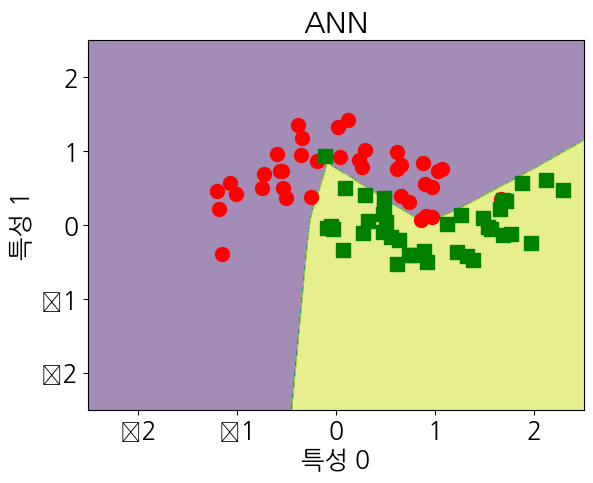

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100,noise=0.25,random_state=3)
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42)
mlp=MLPClassifier(max_iter=3000,random_state=0).fit(X_train,y_train)
# adam : learning-rate, momentum(zigzag이동 방지: 가던방향을 고려해서)
# 처음에는 오차가 작아지면 점점 작게 조절 (작은 데이터로도 fitting가능 )
# alpha L2 regularization 과적합을 방지
# batch_size 여러개의 sample의 결과값을 한번에 조절 : 지역해에 빠지는 것을 방지
# 평균으로 한번 오차를 조절
# adaptive
# momentum, nesterovs_momentum(가던방향의 끝에서 주어진 방향으로)
# early_stopping 과적합 방지 오차가 늘어나면 일정기간 참다가 종
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plot_iris(X_train,y_train,mlp,'ANN')


In [ ]:
mlp.coefs_ # 가중치

In [11]:
mlp.get_params() # default parameter

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


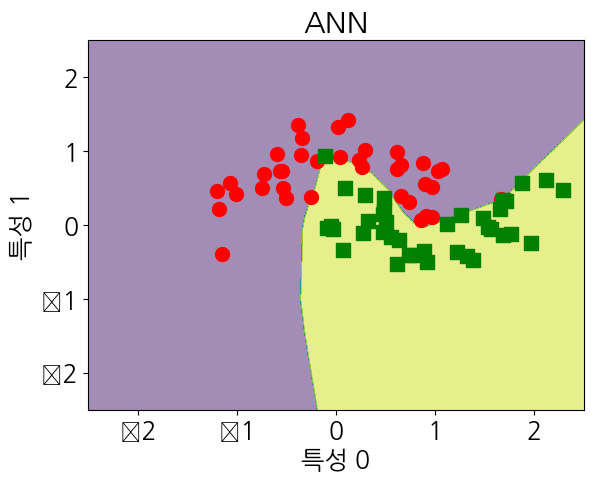

In [14]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[20,20])
mlp.fit(X_train,y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plot_iris(X_train,y_train,mlp,'ANN')

In [16]:
X_train.shape

(75, 2)

In [15]:
# ndarray를 list로 묶어 놓음
mlp.coefs_[0].shape
# (75,2)(2,20) # 이 20이 가중치라는 거임
# => (75,20)
# 이진 분류문제이기 때문에 (20,1) 자동 결정
# (75,20)(20,1) => binary인 경우 1개가 나감

(2, 20)

In [17]:
mlp.coefs_[1].shape

(20, 20)

In [ ]:
mlp=MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[30,10])
mlp.fit(X_train,y_train)
# 입력 (75,2)
# 75x2, 2x30, 30x10, 10x1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


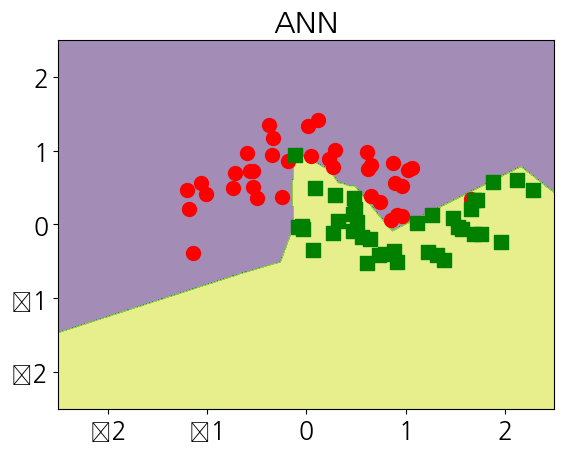

In [27]:
mlp=MLPClassifier(solver='lbfgs',max_iter=500,
                  random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
plot_iris(X_train,y_train,mlp,'ANN')

In [26]:
# 가중치 사이즈 계산
# 입력 : (75,2)
# 75x2 2x10 10x10 10x1

(75, 2)

In [ ]:
fig,axes=plt.subplots(2,4,figsize=(20,8)) 
# layer의 사이즈를 변화시킬 때 큰 사이즈는 과적합을 불어온다.
# 가중치를 100,100으로 하면 75x2 2x100 100x100 100x1
# 특징을 잡아내는 횟수가 늘어남 => 과적합
# 규제는 과적합을 방지 : 규제의 사이즈가 작아지면 규제를 줄이는 것 => 과적
for axx,n_hidden_nodes in zip(axes,[10,100]):
  for ax,alpha in zip(axx,[0.1,0.01,0.001,0.0001]):
    mlp=MLPClassifier(solver='lbfgs',random_state=0,activation='tanh',
                      max_iter=1000,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],
                      alpha=alpha)
    mlp.fit(X_train,y_train)
    plot_iris(X_train,y_train,mlp,'ANN')

In [30]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer=load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
pd.DataFrame(cancer.data).shape

(569, 30)

In [34]:
# 정규화 여부와 신경망 정확도 차이
# 신경망에서는 정규화 하는 것이 유리하다.
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,cancer.target,random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train,y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test,y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [43]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(max_iter=1000,alpha=0.001,solver='sgd',activation='tanh',random_state=0,
                  hidden_layer_sizes=[15,5])
mlp.fit(X_train_scaled,y_train)
print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.958


In [36]:
mlp=MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled,y_train)))
print('테스트 세트 정확도: {:.2f}'.format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
mlp.n_layers_

3

In [38]:
mlp.coefs_[0].shape

(30, 100)

In [39]:
mlp.coefs_[1].shape

(100, 1)

In [ ]:
# 정규화한 모델 [15,5]
# (569,30) (30,15) (15,5) (5,1)

In [44]:
mlp.coefs_[0].shape

(30, 15)

In [45]:
mlp.coefs_[1].shape

(15, 5)

In [46]:
mlp.coefs_[2].shape

(5, 1)

In [48]:
mlp.classes_

array([0, 1])

In [49]:
mlp.loss_

0.07859636214999614

In [50]:
mlp.intercepts_

[array([-0.11144275,  0.33265416, -0.15599357, -0.29642056,  0.33167661,
        -0.19512157,  0.14532101, -0.28807372,  0.15601897,  0.2451209 ,
        -0.1911896 , -0.07076332, -0.06390728,  0.22743349, -0.19914024]),
 array([-0.49553958,  0.12941564,  0.13288166,  0.06505722,  0.44620796]),
 array([0.42739613])]

In [52]:
print(mlp.out_activation_) # logistic 2진분류
# activation function : sigmoid, tanh, relu # node에 붙어서 비선형으로 매핑
# identity(회귀일 때), logistic(이항분류), softmax(다항분류)

logistic


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


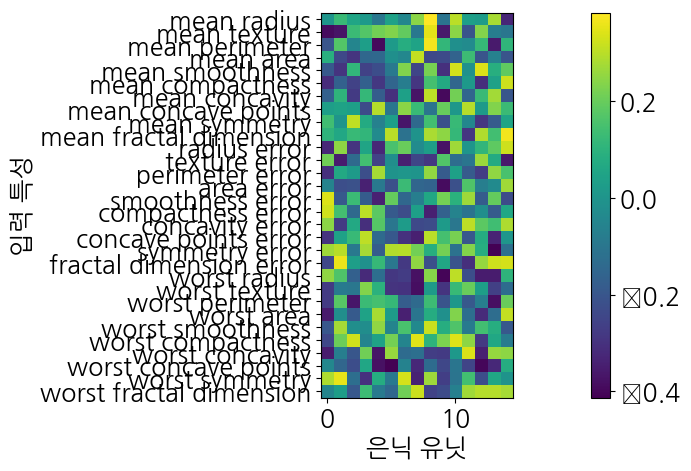

In [53]:
# mlp.coefs_[0] : 30x15 각 변수에 대해서 15번 걸쳐 특징을 추출
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='none',cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

In [95]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/daejeon_1/wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")

In [96]:
# 회귀(identity), 이진분류(logistic), 다중분류(softmax)
print(wine.shape)
wine['Cultivator'].unique()

(178, 14)


array([1, 2, 3])

In [97]:
# X,y 데이터로 분리하시오
X=wine.drop('Cultivator',axis=1)
y=wine['Cultivator']
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [98]:
# 문제 : 독립변수에 정규화 작업을 진행하시오
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [99]:
# 문제) 독립변수에 정규화 작업을 진행
mean_train = X_train.mean(axis=0)
std_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_train) / std_train
X_test_scaled = (X_test - mean_train) / std_train

###
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # 평균, 표준편차  # 변수가 30개(각 특징에 대하여 자동으로 작업)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [100]:
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [101]:
# 문제
# 테스트 데이터에 대하여 예측하고 accuracy_score를 출력하시오 
from sklearn.metrics import accuracy_score
predictions = mlp.predict(X_test)
accuracy_score(predictions,y_test)

1.0

In [102]:
mlp.out_activation_

'softmax'

In [105]:
# 문제
# 파라미터 튜닝을 실시하시오 (GridSearchCV)
# hidden_layer_sizes (30,30,30) (30,20,10)
# alpha : [0.0001,0.001,0.01,0.1,1]

from sklearn.model_selection import GridSearchCV
model=MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=1000)
model_cv=GridSearchCV(model,cv=5,param_grid={
    'hidden_layer_sizes':[(30,30,30),(30,20,10)],
    'alpha':[0.0001,0.001,0.01,0.1,1]})
model_cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(30, 30, 30),
                                     max_iter=1000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(30, 30, 30), (30, 20, 10)]})

In [106]:
model_cv.best_estimator_

MLPClassifier(alpha=0.001, hidden_layer_sizes=(30, 30, 30), max_iter=1000)

In [107]:
model_cv.best_score_
model_cv.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': (30, 30, 30)}

In [108]:
predictions=model_cv.predict(X_test)
accuracy_score(predictions,y_test)

1.0

In [124]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data1=pd.read_csv('/content/drive/MyDrive/daejeon_1/breast-cancer-wisconsin.csv',encoding='utf-8')
print(data1.head())
data1.columns # 'Class':target

      code  Clump_Thickness  Cell_Size  Cell_Shape  Marginal_Adhesion  \
0  1000025                5          1           1                  1   
1  1002945                5          4           4                  5   
2  1015425                3          1           1                  1   
3  1016277                6          8           8                  1   
4  1017023                4          1           1                  3   

   Single_Epithelial_Cell_Size  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  \
0                            2            1                3                1   
1                            7           10                3                2   
2                            2            2                3                1   
3                            3            4                3                7   
4                            2            1                3                1   

   Mitoses  Class  
0        1      0  
1        1      0  
2        1    

Index(['code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [125]:
X = data1[data1.columns[1:10]]
y = data1[['Class']]

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [127]:
X.dtypes
# 회귀,분류(model : XGBoost,SVM) # 딥러닝 무 
# Scaler
# GridSearchCV를 적용

Clump_Thickness                int64
Cell_Size                      int64
Cell_Shape                     int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
dtype: object

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [129]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(X_scaled_train,y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train,y_train)

0.9765625

In [130]:
from sklearn.metrics import confusion_matrix
confusion_train=confusion_matrix(y_train,pred_train)
print('훈련데이터 오차행렬 :\n ',confusion_train)

훈련데이터 오차행렬 :
  [[329   4]
 [  8 171]]


In [131]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

0.9590643274853801

In [132]:
confusion_test=confusion_matrix(y_test,pred_test)
print('테스트데이터 오차행렬:\n',confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [133]:
param_grid={'hidden_layer_sizes':[10,30,50,100],'solver':['sgd','adam'],
            'activation':['tanh','relu']}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(MLPClassifier(),param_grid,cv=5)
grid_search.fit(X_scaled_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [10, 30, 50, 100],
                         'solver': ['sgd', 'adam']})

In [134]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [123]:
data2=pd.read_csv('/content/drive/MyDrive/daejeon_1/house_price.csv',encoding='utf-8')
X=data2[data2.columns[1:5]]
y=data2[['house_value']]

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [140]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor()
model.fit(X_scaled_train,y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train,y_train)

0.8762123338143912

In [141]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

0.8364765209669183

In [142]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train=mean_squared_error(y_train,pred_train)
MSE_test=mean_squared_error(y_test,pred_test)
print('훈련 데이터 RMSE : ',np.sqrt(MSE_train))
print('테스트 데이터 RMSE : ',np.sqrt(MSE_test))

훈련 데이터 RMSE :  0.16593728164053917
테스트 데이터 RMSE :  0.19790967129680195


In [143]:
# 문제
# 모델 튜닝을 통해서 rmse를 줄여보시오 
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(64,64,64),activation='relu',
                   random_state=1,max_iter=2000)
model.fit(X_scaled_train,y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train,y_train)

0.9193200129608278

In [144]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test,y_test)

0.8983323227004723

In [153]:
# 데이터 전송
# 문제
# 데이터를 로딩하시오
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/daejeon_1/201_boston.csv',encoding='utf-8')

In [154]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [155]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [156]:
# CRIM 필드를 기준으로 내림차순으로 정렬하시오
data.sort_values(by='CRIM',ascending=False,inplace=True)

In [157]:
# 정렬된 데이터의 9번째 행을 출력하시오
data.iloc[9,:]

CRIM        25.9406
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6790
RM           5.3040
AGE         89.1000
DIS          1.6475
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          127.3600
LSTAT       26.6400
Name: 417, dtype: float64

In [161]:
# 9번째 행의 데이터로 9번째까지 데이터를 모두 변경하시오 
data.iloc[:9,:]=data.iloc[9,:]

print(data.head(15))

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
418  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
405  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
410  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
414  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
404  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
398  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
427  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
413  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
417  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
400  25.0461  0.0   18.1   0.0  0.693  5.987  100.0  1.5888  24.0  666.0   
403  24.8017  0.0   18.1   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
386  24.3938

In [166]:
# AGE가 80이상인 건물의 RM평균을 구하시오
import numpy as np
np.mean(data[data['AGE']>=80]['RM'])

6.10203734439834

In [167]:
# 문제 1 데이터 로딩 
import pandas as pd
house=pd.read_csv('/content/drive/MyDrive/daejeon_1/202_housing.csv',encoding='utf-8')
house.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [192]:
# 데이터의 total_bedrooms 필드의 80%만 별도로 취함
int(house.shape[0]*0.8)
int(len(house)*0.8)
bedrooms=housing['total_bedrooms'][:int(len(house)*0.8)]
print(bedrooms)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
16507     599.0
16508     331.0
16509     411.0
16510     941.0
16511     417.0
Name: total_bedrooms, Length: 16512, dtype: float64


In [194]:
# 표준편차를 계산
std1=bedrooms.std()
print(std1)

435.90057705252616


In [196]:
# 중위수를 계산
med1=bedrooms.median()
print(med1)

436.0


In [198]:
# 결측값을 중위수로 채움
# 채운후에 표준편차를 구함 
bedrooms_fill=bedrooms.fillna(med1)
std2=bedrooms_fill.std()
print(std2)

433.9254297608805


In [199]:
# 결측치를 채우기 전과 후의 표준편차 차를 구함
result=abs(std1-std2)
print(result)

1.9751472916456692


In [169]:
# 문제 2 데이터를 로딩하고
import pandas as pd
import numpy as np
housing=pd.read_csv('/content/drive/MyDrive/daejeon_1/202_housing.csv',encoding='utf-8')

In [202]:
# housing['population']에 대하여 평균과 표준편차를 구하시오
population=housing['population']
mean=np.mean(housing['population'])
std=np.std(housing['population'])
print(mean)
print(std)

1425.4767441860465
1132.434687757615


In [204]:
# 이상치의 임계치를 계산하시오 (평균과 표준편차의 1.5배수) 로 구하기
lower=mean-1.5*std
upper=mean+1.5*std
# 이상값 데이터를 추출하시오
population_outlier = population[(population<lower)|(population>upper)]
print(population_outlier)
# 이상값 데이터의 합계를 구하시오 
result=population_outlier.sum()
print(result)

95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Name: population, Length: 1207, dtype: float64
5607295.0


In [172]:
# 이상치의 임계치를 계산하시오 (IQR)
Q1=np.quantile(housing['population'],0.25)
Q3=np.quantile(housing['population'],0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
print(lower,upper)

-620.0 3132.0


In [186]:
# 이상값 데이터를 추출하시오
print(housing['population'][(housing['population']<lower) & (housing['population']>upper)])

Series([], Name: population, dtype: float64)


In [187]:
# 이상값 데이터의 합계를 구하시오 
sum(housing['population'][(housing['population']<lower) & (housing['population']>upper)])

0

In [205]:
# 신경망의 softmax
# 신경망
# 회귀 : identity
# 이진분류 : logistic
# 다중분류 : softmax

In [206]:
import numpy as np
scores=[3.0,1.0,0.2] # 3개로 분류
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

In [207]:
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [208]:
sum(softmax(scores))

0.9999999999999999

-1.0
-1.0


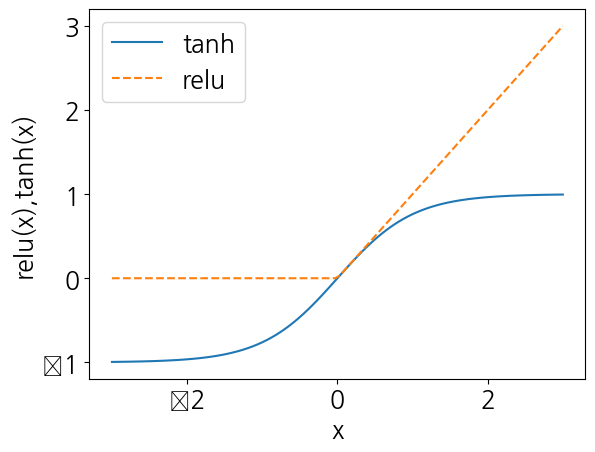

In [209]:
# relu함수를 사용했더니 fitting이 빨라짐 
# activation function 비선형 매핑
# 내적하는 연산 node마다 activation function을 작동
line=np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label='tanh') # 값의 범위 : -1 ~ 1
plt.plot(line,np.maximum(line,0),linestyle='--',label='relu') # np.maximum(line,0) relu
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x),tanh(x)')
print(np.tanh(-100))
print(np.tanh(-1000000))

In [210]:
def sigmoid(inputs):
  sigmoid_scores=[1/float(1+np.exp(-x)) for x in inputs]
  return sigmoid_scores
sigmoid_inputs = [2,3,5,6,10,100]
sigmoid(sigmoid_inputs)

[0.8807970779778823,
 0.9525741268224334,
 0.9933071490757153,
 0.9975273768433653,
 0.9999546021312976,
 1.0]

In [214]:
# bostondata 를 로딩한 다음
import pandas as pd
import numpy as np
data_url='http://lib.stat.cmu.edu/datasets/boston'
title=['CRIM','ZM','INDUS','CHAS','NOX','RM','AGE','RAD','TAX','PTRATIO','B','LSTAT','medv']
raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
target=raw_df.values[1::2,2]
print(type(data))
boston_df=pd.DataFrame(data,columns=title)
boston_df.head()
X=boston_df.iloc[:,:12] # 독립변수
y=boston_df.iloc[:,12]  # 종속변수

<class 'numpy.ndarray'>


,CRIM,ZM,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [215]:
boston_df.dtypes

CRIM       float64
ZM         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
medv       float64
dtype: object

In [ ]:
# 데이터 분포를 시각화 하시오
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(13, 1, figsize=(10, 30))

# 각 열의 데이터에 대해 그래프 그리기
for i, col in enumerate(boston_df.columns):
    axes[i].plot(boston_df[col])
    axes[i].set_title(col)

# 그래프 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()


In [ ]:
boston_df.hist(bins=30,figsize=(15,10))
plt.tight_layout()
plt.show()

In [229]:
# 각 열의 데이터에 대하여 평균과 표준편차를 구하시오 
bos_mean=boston_df.mean()
print(bos_mean)
bos_std=boston_df.std()
print(bos_std)

CRIM         3.613524
ZM          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
RAD          3.795043
TAX          9.549407
PTRATIO    408.237154
B           18.455534
LSTAT      356.674032
medv        12.653063
dtype: float64
CRIM         8.601545
ZM          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
RAD          2.105710
TAX          8.707259
PTRATIO    168.537116
B            2.164946
LSTAT       91.294864
medv         7.141062
dtype: float64


In [230]:
# 7:3 데이터를 분할한다음 신경망을 이용해서 예측 모델을 구성
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [237]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_scaled_train=scaler.transform(X_train)
X_scaled_test=scaler.transform(X_test)

from sklearn.neural_network import MLPRegressor
model=MLPRegressor()
model.fit(X_scaled_train,y_train)
mlp=MLPRegressor()
mlp.fit(X_train,y_train)
pred_train=model.predict(X_scaled_train)

# 평가
print(model.score(X_scaled_train,y_train))
print(mlp.score(X_train,y_train))
print(mlp.score(X_test,y_test))

0.8624950482382993
0.8839020534112872
0.7254640697013587


In [234]:
# parameter tunning으로 rmse의 값인 오차를 줄여보시오
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# 튜닝할 파라미터 그리드 생성
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,),(10,10), (20,20),(30,30),(10,10,10),(20,20,20),(30,30,30),(10,10,10,10),(20,20,20,20),(30,30,30,30)],  # 은닉층 크기
    'activation': ['relu', 'tanh', 'sigmoid'],  # 활성화 함수
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1]  # 정규화 파라미터
}

# GridSearchCV를 사용하여 모델 튜닝
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

# 최적의 모델 및 파라미터 출력
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
pred_train = best_model.predict(X_scaled_train)

Best parameters:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (30, 30, 30, 30)}
Best score:  0.8984872073274435
